In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
dirCat=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\catalogs\forPaper\v05'
fileNameCat=r'05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors.csv'
idcolumn='Seq'
zspeccolumn='z_spec'
cat=pd.read_csv(os.path.join(dirCat,fileNameCat))

In [44]:
cat.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap2', 'Ksmagap3', 'Ksmag',
       'KsmagISO', 'Ymagap2', 'Ymagap3', 'Ymag',
       ...
       'Separation', 'u-B', 'B-V', 'V-r', 'r-ip', 'ip-zpp', 'zpp-Y', 'Y-J',
       'J-H', 'H-Ks'],
      dtype='object', length=128)

In [45]:
broadBands={'names':['u', 'B', 'V', 'r', 'ip', 'zpp', 'Y'],
            'cwLength':['3823.3', '4458.3', '5477.8', '6288.7', '7683.9', '9105.7', '9791.4'],
            'width':['670', '946', '955', '1382', '1497', '1370', '820']}

narrowBands={'names':['IA427', 'IA464', 'IA484', 'IA505', 'IA527', 
             'IA574', 'IA624', 'IA679', 'IA709', 'IA738', 
             'IA767', 'IA827', 'NB711', 'NB816'],
             'cwLength':['4263.4', '4635.1', '4849.2', '5062.5', '5261.1', 
                         '5764.8', '6233.1', '6781.1', '7073.6', '7361.6', 
                         '7684.9', '8244.5', '7119.9', '8149.4'],
             'width':['206.5', '218.0', '228.5', '230.5', '242.0', 
                      '271.5', '300.5', '336.0', '315.5', '323.5', 
                      '364.0', '343.5', '72.5', '119.5']}

In [30]:
diffs=[]
for (bName, bWave, bWidth) in zip(broadBands['names'],broadBands['cwLength'],broadBands['width']):
    low=float(bWave)-float(bWidth)
    high=float(bWave)+float(bWidth)
    for (nName, nWave) in zip(narrowBands['names'],narrowBands['cwLength']):
        if nName+'ap3' in cat.columns:
            if float(nWave)>low and float(nWave)<high:
                diffs.append((bName,nName))

In [31]:
diffs

[('B', 'IA484'),
 ('B', 'IA527'),
 ('V', 'IA484'),
 ('V', 'IA527'),
 ('V', 'IA624'),
 ('r', 'IA527'),
 ('r', 'IA624'),
 ('r', 'IA679'),
 ('r', 'IA738'),
 ('r', 'NB711'),
 ('ip', 'IA624'),
 ('ip', 'IA679'),
 ('ip', 'IA738'),
 ('ip', 'IA767'),
 ('ip', 'NB711'),
 ('ip', 'NB816'),
 ('zpp', 'NB816')]

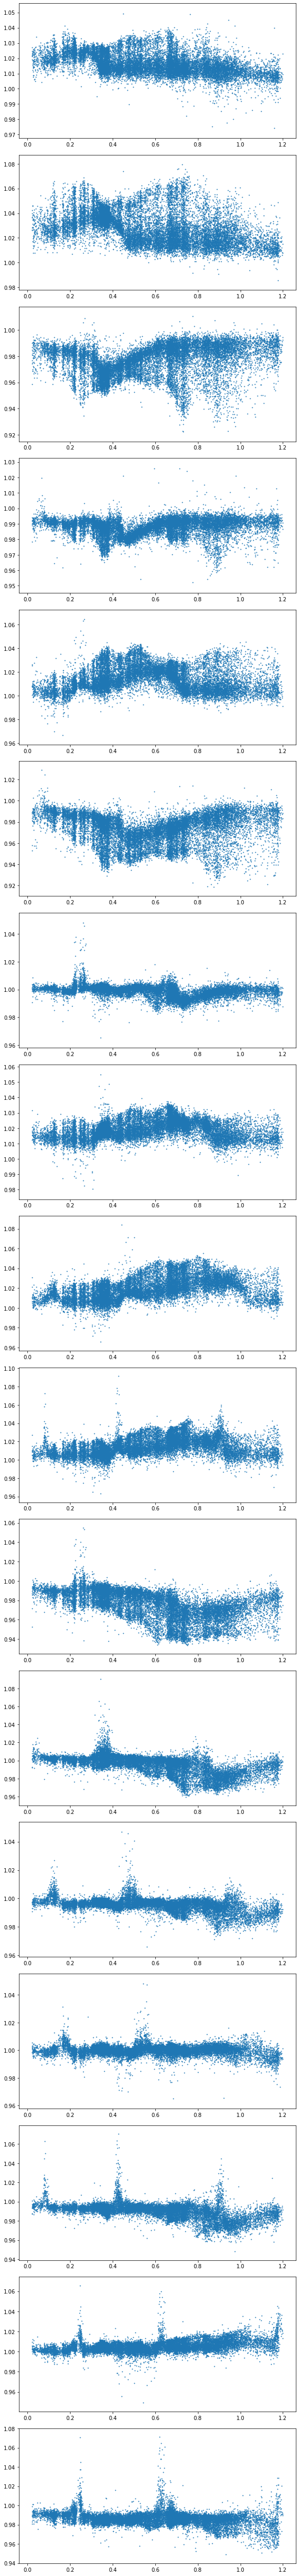

In [39]:
fig, axs=plt.subplots(len(diffs),1,figsize=(8,4*len(diffs)),sharex='row')
for i,d in enumerate(diffs):
    ax=axs[i]
    dd=cat[d[0]+'magap3']/cat[d[1]+'ap3']
    ax.scatter(cat[zspeccolumn],dd,s=1)
plt.tight_layout()

In [40]:
for d in diffs:
    cat[d[0]+'/'+d[1]]=cat[d[0]+'magap3']/cat[d[1]+'ap3']

In [41]:
cat.to_csv(os.path.join(dirCat,fileNameCat.replace('.csv','_ratios.csv')),index=False)

In [46]:
for d in diffs:
    print(d[0]+'/'+d[1])

B/IA484
B/IA527
V/IA484
V/IA527
V/IA624
r/IA527
r/IA624
r/IA679
r/IA738
r/NB711
ip/IA624
ip/IA679
ip/IA738
ip/IA767
ip/NB711
ip/NB816
zpp/NB816
